In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import os

In [3]:
file_path = 'https://raw.githubusercontent.com/AlejandroSegura24/car-assignment-analysis/refs/heads/main/data/CarPrice_Assignment.csv'
data = pd.read_csv(file_path, encoding='windows-1252')

## Extraccion de informacion y limpieza de datos

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data['CarName'] = data['CarName'].str.split(' ',expand=True)[0]

In [7]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
data.shape

(205, 26)

In [10]:
unique_values = {col: data[col].unique() for col in data.columns}

for col, values in unique_values.items():
  print(f'Columna: {col}')
  print(f'Numero de valores únicos: {len(values)}')
  print(f'Valores unicos: {values[:10]}')
  print('-' * 50)

Columna: car_ID
Numero de valores únicos: 205
Valores unicos: [ 1  2  3  4  5  6  7  8  9 10]
--------------------------------------------------
Columna: symboling
Numero de valores únicos: 6
Valores unicos: [ 3  1  2  0 -1 -2]
--------------------------------------------------
Columna: CarName
Numero de valores únicos: 22
Valores unicos: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick']
--------------------------------------------------
Columna: fueltype
Numero de valores únicos: 2
Valores unicos: ['gas' 'diesel']
--------------------------------------------------
Columna: aspiration
Numero de valores únicos: 2
Valores unicos: ['std' 'turbo']
--------------------------------------------------
Columna: doornumber
Numero de valores únicos: 2
Valores unicos: ['two' 'four']
--------------------------------------------------
Columna: carbody
Numero de valores únicos: 5
Valores unicos: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
-----------

### Valores nulos o duplicados

In [11]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

## Exploracion de la informacion

In [13]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## vision general del dataset

In [14]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [16]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [17]:
data = data[['CarName', 'doornumber', 'carbody', 'carlength', 'carwidth', 'carheight', 'enginetype', 'horsepower', 'price']]

## analisis unidimensional de las variables

<Axes: xlabel='CarName'>

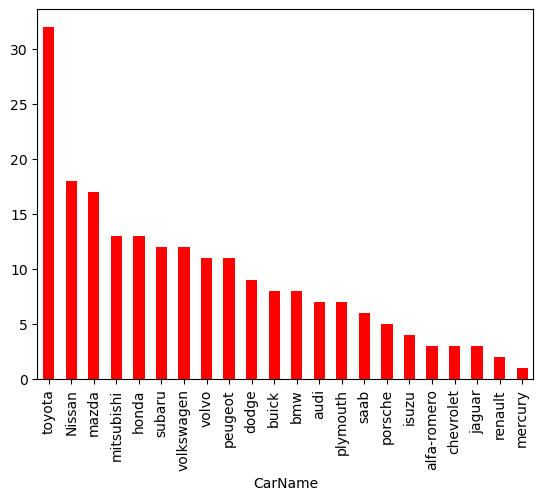

In [18]:
data.CarName.value_counts().plot(kind='bar',color='red',)

<Axes: >

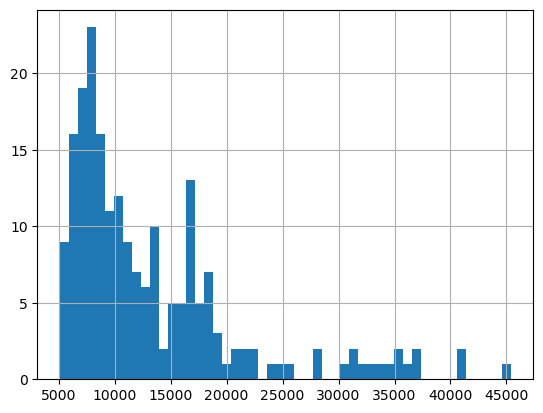

In [19]:
data['price'].hist(bins=50)

## analisis multidimensional de las variables

In [20]:
total_sum_carname = data.groupby('CarName').sum()['price'].sort_values(ascending=False)
total_sum_carname.reset_index()

,CarName,price
0,toyota,316346.000
1,buick,269176.000
2,bmw,208950.000
3,volvo,198695.000
4,Nissan,187482.000
5,mazda,181099.000
6,peugeot,170380.000
7,porsche,157002.500
8,audi,125014.167
9,volkswagen,120930.000


<Axes: xlabel='CarName'>

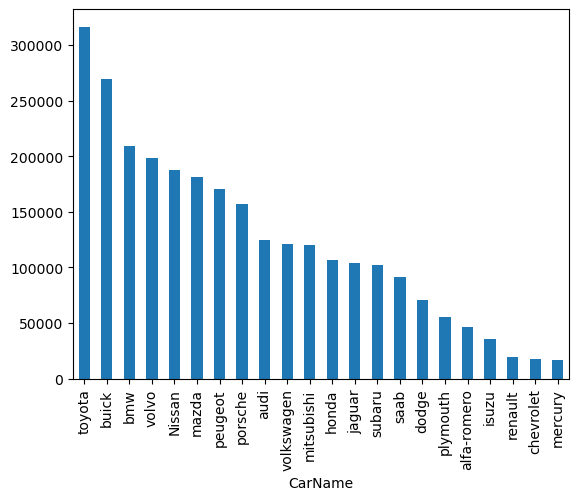

In [21]:
total_sum_carname.plot(kind='bar', x='carName')

In [22]:
mean_carname = data.groupby('CarName')['price'].mean().sort_values(ascending=False)
mean_carname.reset_index()

,CarName,price
0,jaguar,34600.000000
1,buick,33647.000000
2,porsche,31400.500000
3,bmw,26118.750000
4,volvo,18063.181818
5,audi,17859.166714
6,mercury,16503.000000
7,alfa-romero,15498.333333
8,peugeot,15489.090909
9,saab,15223.333333


<Axes: xlabel='CarName'>

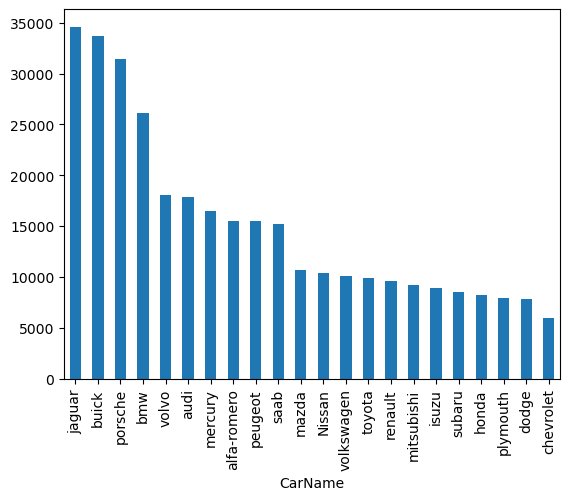

In [23]:
mean_carname.plot(kind='bar', x='carName')

## analisis de texto